# **Data Science on bicycle counts on Seattle's Fremont Bridge**

> This project comes from:  
> [Data Science Project on Time Series - Aman Kharwal](https://amanxai.com/2020/05/08/data-science-project-on-time-series/)

## Let's import our librairies and prepare our data

In [91]:
# Importation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [92]:
# Loading data
df_bike = pd.read_csv('data/fremont-bridge.csv', index_col='Date', parse_dates=True)
df_bike.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


Let's add a new column:

In [93]:
df_bike['Total'] = df_bike['West'] + df_bike['East']
df_bike.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


Then, let's take a look at the summary statistics:

In [94]:
df_bike.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


## **Let's visualize our data**

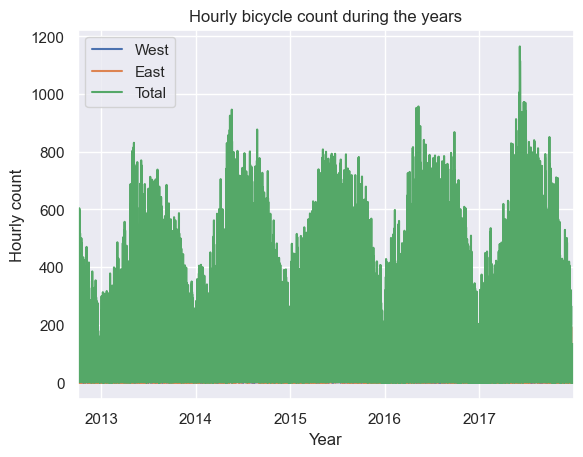

In [95]:
# What about the raw data ?
df_bike.plot()
plt.xlabel("Year")
plt.ylabel("Hourly count")
plt.title('Hourly bicycle count during the years')
plt.show()

This result is too dense to make much sense of it.  
To gain more insight, let's resample by week:

In [96]:
weekly = df_bike.resample("W").sum()
weekly.head()

,West,East,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0


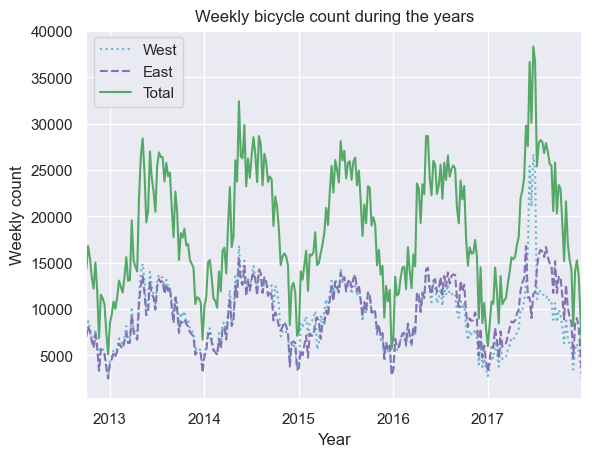

In [97]:
# Visualize it
weekly.plot(style=[':c', '--m', '-g'])
plt.xlabel("Year")
plt.ylabel("Weekly count")
plt.title('Weekly bicycle count during the years')
plt.show()

We can see that the bicycle count is higher during the summer than the winter.  
We also see that it vary a lot from week to week.

### Let use a rolling mean of our data on a 30-day

In [98]:
# Doing our rolling mean on 30-day
daily = df_bike.resample('D').sum()
daily = daily.rolling(30, center=True).sum()
daily.head()

,West,East,Total
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN
2012-10-06,NaN,NaN,NaN
2012-10-07,NaN,NaN,NaN


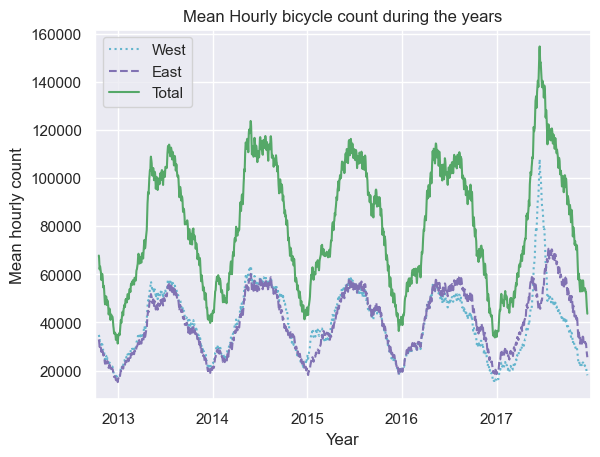

In [99]:
# Let's visualize it
daily.plot(style=[':c', '--m', '-g'])
plt.xlabel("Year")
plt.ylabel("Mean hourly count")
plt.title('Mean Hourly bicycle count during the years')
plt.show()

Our results are still irregular due to the hard cutoff of the window.  
To get a smoother version, let's use a **Gaussian window**.

In [100]:
# Rolling on a Gaussian window
daily = daily.rolling(50, center=True, win_type='gaussian').sum(std=10)

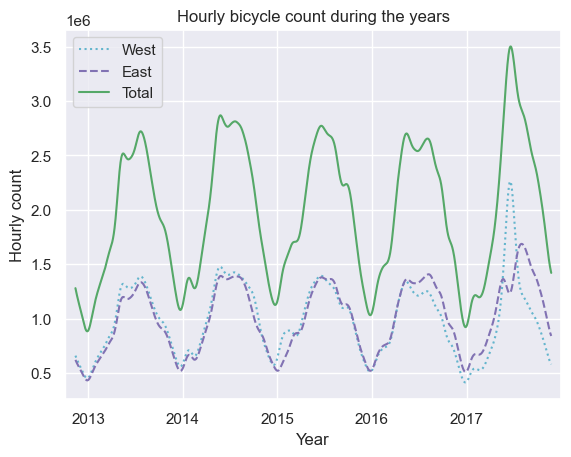

In [101]:
# Visualize it
daily.plot(style=[':c', '--m', '-g'])
plt.xlabel("Year")
plt.ylabel("Hourly count")
plt.title('Hourly bicycle count during the years')
plt.show()

## **Digging into the data**

So far, we have looked at the trend in data over several years.  
Now let's look at the average traffic during a day:

In [102]:
# Create our new df
by_time = df_bike.groupby(df_bike.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
print(hourly_ticks)

[    0 14400 28800 43200 57600 72000]


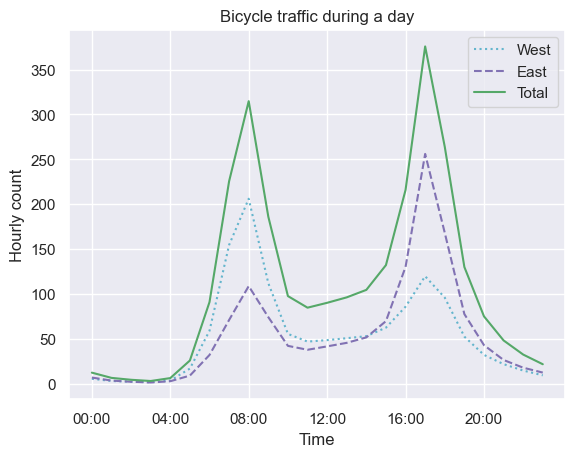

In [103]:
# Visualize it now
by_time.plot(xticks=hourly_ticks, style=[':c', '--m', '-g'])
plt.xlabel('Time')
plt.ylabel("Hourly count")
plt.title('Bicycle traffic during a day')
plt.show()

## Let's save our 2 outputs

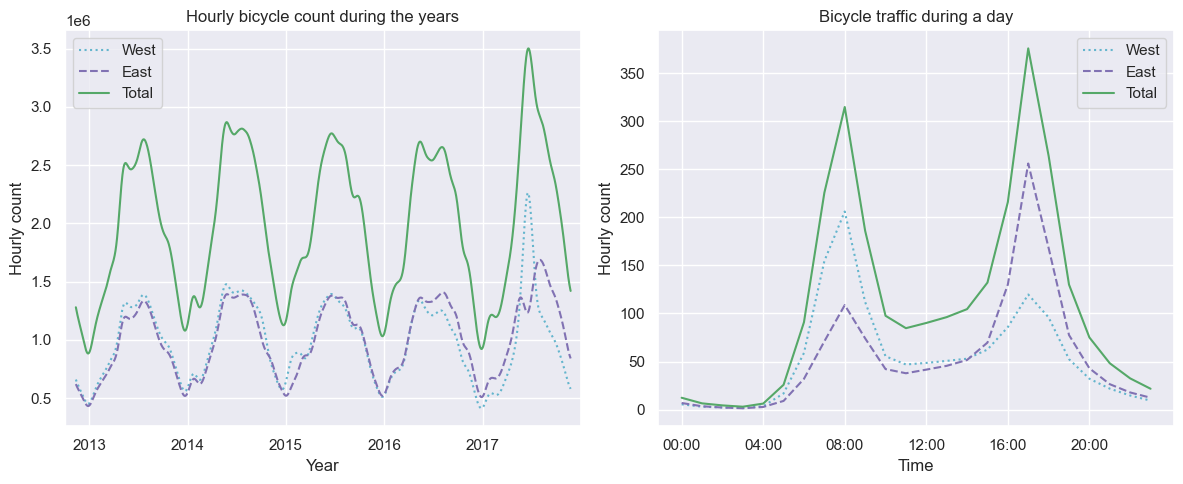

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

daily.plot(ax=axes[0], style=[':c', '--m', '-g'])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Hourly count")
axes[0].set_title('Hourly bicycle count during the years')

by_time.plot(ax=axes[1], xticks=hourly_ticks, style=[':c', '--m', '-g'])
axes[1].set_xlabel('Time')
axes[1].set_ylabel("Hourly count")
axes[1].set_title('Bicycle traffic during a day')

plt.tight_layout()
plt.savefig('Outputs.png', dpi=300, bbox_inches='tight')
plt.show()